In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df3=pd.read_csv("incident_event_log.csv")

In [3]:
df3.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [4]:
df3[df3['number']=='INC0000045'][['sys_created_by','sys_updated_by','reopen_count','cmdb_ci','impact','urgency','priority','knowledge','u_priority_confirmation']]

,sys_created_by,sys_updated_by,reopen_count,cmdb_ci,impact,urgency,priority,knowledge,u_priority_confirmation
0,Created by 6,Updated by 21,0,?,2 - Medium,2 - Medium,3 - Moderate,True,False
1,Created by 6,Updated by 642,0,?,2 - Medium,2 - Medium,3 - Moderate,True,False
2,Created by 6,Updated by 804,0,?,2 - Medium,2 - Medium,3 - Moderate,True,False
3,Created by 6,Updated by 908,0,?,2 - Medium,2 - Medium,3 - Moderate,True,False


In [5]:
df3.head(10)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
5,INC0000047,Active,True,1,0,1,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
6,INC0000047,Active,True,1,0,2,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
7,INC0000047,Active,True,1,0,3,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
8,INC0000047,Active,True,1,0,4,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
9,INC0000047,Active,True,1,0,5,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [6]:
df3.isnull().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

**Converting time features into datetime format**

In [7]:
df3['opened_at']=pd.to_datetime(df3['opened_at'])

In [8]:
df3['closed_at']=pd.to_datetime(df3['closed_at'])

In [9]:
df3[df3['resolved_at']=='?'][['sys_created_by','sys_updated_by','reopen_count','cmdb_ci','impact','urgency','priority','knowledge','u_priority_confirmation','resolved_at']]

,sys_created_by,sys_updated_by,reopen_count,cmdb_ci,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at
173,?,Updated by 908,0,?,2 - Medium,2 - Medium,3 - Moderate,True,False,?
174,?,Updated by 908,0,?,2 - Medium,2 - Medium,3 - Moderate,True,False,?
423,?,Updated by 908,0,?,2 - Medium,2 - Medium,3 - Moderate,True,False,?
424,?,Updated by 908,0,?,2 - Medium,2 - Medium,3 - Moderate,True,False,?
548,?,Updated by 908,0,?,3 - Low,3 - Low,4 - Low,True,False,?
...,...,...,...,...,...,...,...,...,...,...
141699,?,Updated by 533,0,?,2 - Medium,2 - Medium,3 - Moderate,False,False,?
141700,?,Updated by 698,0,?,2 - Medium,2 - Medium,3 - Moderate,False,False,?
141701,?,Updated by 845,0,?,2 - Medium,2 - Medium,3 - Moderate,False,False,?
141702,?,Updated by 845,0,?,2 - Medium,2 - Medium,3 - Moderate,False,False,?


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141712 non-null  object        
 1   incident_state           141712 non-null  object        
 2   active                   141712 non-null  bool          
 3   reassignment_count       141712 non-null  int64         
 4   reopen_count             141712 non-null  int64         
 5   sys_mod_count            141712 non-null  int64         
 6   made_sla                 141712 non-null  bool          
 7   caller_id                141712 non-null  object        
 8   opened_by                141712 non-null  object        
 9   opened_at                141712 non-null  datetime64[ns]
 10  sys_created_by           141712 non-null  object        
 11  sys_created_at           141712 non-null  object        
 12  sys_updated_by  

In [11]:
df3['opened_at'].head(2)

0   2016-02-29 01:16:00
1   2016-02-29 01:16:00
Name: opened_at, dtype: datetime64[ns]

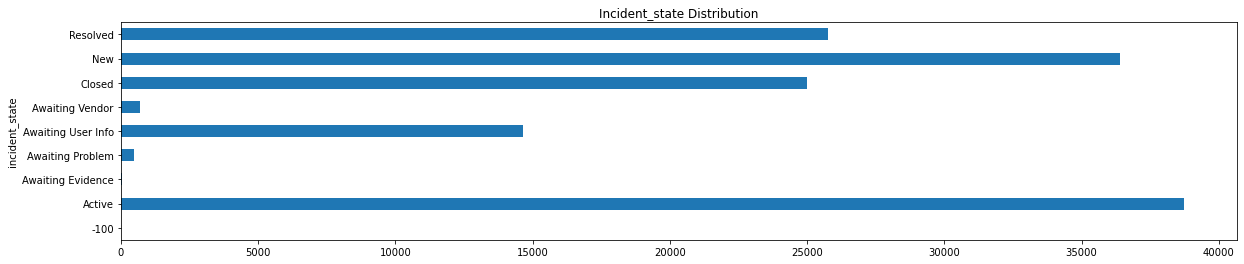

In [12]:
df3.groupby('incident_state').count()['number'] .plot(kind='barh',title='Incident_state Distribution',
          figsize=(20, 4))
plt.show()

In [13]:
df3['incident_state'].value_counts()

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64

In [14]:
df3.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


**Finding the incident closed code to check which type to tickets are raised more**

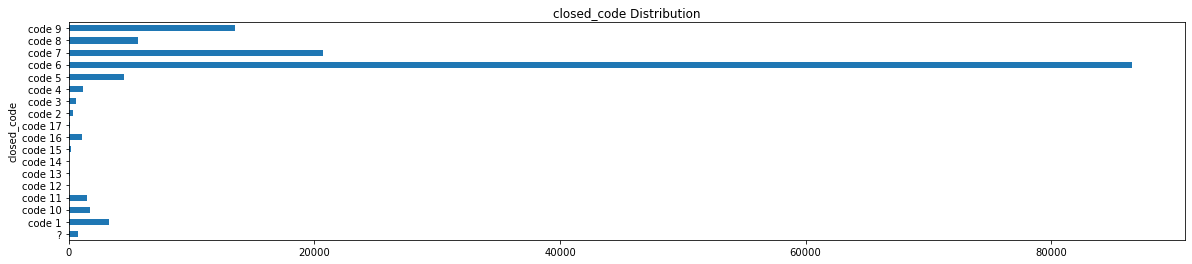

In [15]:
df3.groupby('closed_code').count()['number'] .plot(kind='barh',title='closed_code Distribution',
          figsize=(20, 4))
plt.show()

In [16]:
df3['closed_code'].value_counts()

code 6     86583
code 7     20733
code 9     13562
code 8      5646
code 5      4469
code 1      3265
code 10     1678
code 11     1493
code 4      1139
code 16     1091
?            714
code 3       608
code 2       349
code 15      183
code 17      115
code 13       59
code 12       13
code 14       12
Name: closed_code, dtype: int64

**Taking the important features and copying into a new dataset**

In [17]:
imp_features=df3[["number","incident_state","active","sys_mod_count","made_sla","caller_id","opened_by","opened_at","impact","priority","u_priority_confirmation","resolved_by","resolved_at","closed_at","closed_code"]]

In [18]:
df_imp=imp_features.copy()

In [19]:
df_imp.head(2)

,number,incident_state,active,sys_mod_count,made_sla,caller_id,opened_by,opened_at,impact,priority,u_priority_confirmation,resolved_by,resolved_at,closed_at,closed_code
0,INC0000045,New,True,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,2 - Medium,3 - Moderate,False,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00,code 5
1,INC0000045,Resolved,True,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,2 - Medium,3 - Moderate,False,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00,code 5


In [20]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141712 non-null  object        
 1   incident_state           141712 non-null  object        
 2   active                   141712 non-null  bool          
 3   sys_mod_count            141712 non-null  int64         
 4   made_sla                 141712 non-null  bool          
 5   caller_id                141712 non-null  object        
 6   opened_by                141712 non-null  object        
 7   opened_at                141712 non-null  datetime64[ns]
 8   impact                   141712 non-null  object        
 9   priority                 141712 non-null  object        
 10  u_priority_confirmation  141712 non-null  bool          
 11  resolved_by              141712 non-null  object        
 12  resolved_at     

In [21]:
df_imp[df_imp['number']=='INC0000045'][['number','incident_state','active','made_sla','opened_at','impact','priority','resolved_at','u_priority_confirmation','closed_at','closed_code']]

,number,incident_state,active,made_sla,opened_at,impact,priority,resolved_at,u_priority_confirmation,closed_at,closed_code
0,INC0000045,New,True,True,2016-02-29 01:16:00,2 - Medium,3 - Moderate,29/2/2016 11:29,False,2016-05-03 12:00:00,code 5
1,INC0000045,Resolved,True,True,2016-02-29 01:16:00,2 - Medium,3 - Moderate,29/2/2016 11:29,False,2016-05-03 12:00:00,code 5
2,INC0000045,Resolved,True,True,2016-02-29 01:16:00,2 - Medium,3 - Moderate,29/2/2016 11:29,False,2016-05-03 12:00:00,code 5
3,INC0000045,Closed,False,True,2016-02-29 01:16:00,2 - Medium,3 - Moderate,29/2/2016 11:29,False,2016-05-03 12:00:00,code 5


In [22]:
df_imp.columns

Index(['number', 'incident_state', 'active', 'sys_mod_count', 'made_sla',
       'caller_id', 'opened_by', 'opened_at', 'impact', 'priority',
       'u_priority_confirmation', 'resolved_by', 'resolved_at', 'closed_at',
       'closed_code'],
      dtype='object')

In [23]:
(df_imp.groupby(['number']).agg({'closed_at': [np.min,np.max]}).reset_index().reset_index()[('closed_at', 'amin')] - df_imp.groupby(['number']).agg({'opened_at': [np.min,np.max]}).reset_index().reset_index()[('opened_at', 'amax')])

0        64 days 10:44:00
1        95 days 05:20:00
2        94 days 20:50:00
3       125 days 06:22:00
4        64 days 09:02:00
               ...       
24913     1 days 22:48:00
24914     0 days 00:00:00
24915     0 days 21:53:00
24916     0 days 00:44:00
24917     0 days 02:21:00
Length: 24918, dtype: timedelta64[ns]

In [24]:
df_imp["active"] = df_imp["active"].astype(int)
df_imp["made_sla"] = df_imp["made_sla"].astype(int)
df_imp["u_priority_confirmation"] = df_imp["u_priority_confirmation"].astype(int)

In [25]:
unique_tickets = df_imp.groupby(['number']).agg({'closed_at': [np.min,np.max]}).reset_index().reset_index()['number'].values

In [26]:
unique_tickets

array(['INC0000045', 'INC0000047', 'INC0000057', ..., 'INC0120495',
       'INC0120835', 'INC0121064'], dtype=object)

In [27]:
new_df = pd.DataFrame(data=unique_tickets, columns=['ticket_id'])
#new_df['y']= (df_imp.groupby(['number']).agg({'closed_at': [np.min,np.max]}).reset_index().reset_index()[('closed_at', 'amin')] - df_imp.groupby(['number']).agg({'opened_at': [np.min,np.max]}).reset_index().reset_index()[('opened_at', 'amax')])
new_df['y']= df_imp.closed_at-df_imp.opened_at

In [28]:
imp_features2=df3[["incident_state","active","sys_mod_count","made_sla","caller_id","opened_by","opened_at","impact","priority","u_priority_confirmation","resolved_by","resolved_at","closed_at","closed_code"]]

In [29]:
new_df=new_df.join(imp_features2)

In [30]:
new_df['y']

0          64 days 10:44:00
1          64 days 10:44:00
2          64 days 10:44:00
3          64 days 10:44:00
4          95 days 05:20:00
                ...        
24913   -193 days +03:16:00
24914   -193 days +03:16:00
24915   -193 days +03:16:00
24916   -193 days +03:16:00
24917   -193 days +03:16:00
Name: y, Length: 24918, dtype: timedelta64[ns]

In [31]:
new_df[new_df['ticket_id']=='INC0000899']

,ticket_id,y,incident_state,active,sys_mod_count,made_sla,caller_id,opened_by,opened_at,impact,priority,u_priority_confirmation,resolved_by,resolved_at,closed_at,closed_code
489,INC0000899,-26 days +02:23:00,New,True,0,True,Caller 4414,Opened by 131,2016-02-29 10:39:00,2 - Medium,3 - Moderate,False,Resolved by 184,2/3/2016 13:01,2016-02-03 13:02:00,code 1


**Converting timestamp into hours**

In [32]:
new_df['y']=new_df['y']/np.timedelta64(1,'h')

In [39]:
new_df.head()

,ticket_id,y,incident_state,active,sys_mod_count,made_sla,caller_id,opened_by,opened_at,impact,priority,u_priority_confirmation,resolved_by,resolved_at,closed_at,closed_code
0,0000045,1546.733333,New,True,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,2 - Medium,3 - Moderate,False,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00,code 5
1,0000047,1546.733333,Resolved,True,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,2 - Medium,3 - Moderate,False,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00,code 5
2,0000057,1546.733333,Resolved,True,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,2 - Medium,3 - Moderate,False,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00,code 5
3,0000060,1546.733333,Closed,False,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,2 - Medium,3 - Moderate,False,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00,code 5
4,0000062,2285.333333,New,True,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,2 - Medium,3 - Moderate,False,Resolved by 81,1/3/2016 09:52,2016-06-03 10:00:00,code 5


In [46]:
#new_df[new_df['y']<0].head(50)
#new_df[(new_df['y']<0) &  (new_df['opened_at']>new_df['closed_at'])]
new_df.drop(new_df[(new_df['y']<0) &  (new_df['opened_at']>new_df['closed_at'])].index,inplace=True)

In [49]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10686 entries, 0 to 24731
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ticket_id                10686 non-null  object        
 1   y                        10686 non-null  float64       
 2   incident_state           10686 non-null  object        
 3   active                   10686 non-null  bool          
 4   sys_mod_count            10686 non-null  int64         
 5   made_sla                 10686 non-null  bool          
 6   caller_id                10686 non-null  object        
 7   opened_by                10686 non-null  object        
 8   opened_at                10686 non-null  datetime64[ns]
 9   impact                   10686 non-null  object        
 10  priority                 10686 non-null  object        
 11  u_priority_confirmation  10686 non-null  bool          
 12  resolved_by              10686 n

**Converting boolean features into numerical features**

In [50]:
new_df['ticket_id']=new_df['ticket_id'].map(lambda x: x.lstrip('INC'))

In [51]:
y = new_df['y'].values
X = new_df.drop(['y'], axis=1)
X.head(1)

,ticket_id,incident_state,active,sys_mod_count,made_sla,caller_id,opened_by,opened_at,impact,priority,u_priority_confirmation,resolved_by,resolved_at,closed_at,closed_code
0,0000045,New,True,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,2 - Medium,3 - Moderate,False,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00,code 5


In [52]:
y

array([1546.73333333, 1546.73333333, 1546.73333333, ..., 1485.11666667,
       1485.11666667, 1485.11666667])

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print("x_train: ",X_train.shape)
print("x_test : ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test : ",y_test.shape)

x_train:  (7159, 15)
x_test :  (3527, 15)
y_train:  (7159,)
y_test :  (3527,)


**Vectorizing the categorical features**

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec_tf_state= TfidfVectorizer(min_df=15,ngram_range=(1,4),max_features=8000)
vec_tf_state.fit(X_train['incident_state'].values)

X_train_state_tf = vec_tf_state.transform(X_train['incident_state'].values)
X_test_state_tf = vec_tf_state.transform(X_test['incident_state'].values)
print("After vectorizations")
print(X_train_state_tf.shape, y_train.shape)
print(X_test_state_tf.shape, y_test.shape)

After vectorizations
(7159, 14) (7159,)
(3527, 14) (3527,)


In [55]:
vec_tf_cid= TfidfVectorizer(min_df=15,ngram_range=(1,4),max_features=8000)
vec_tf_cid.fit(X_train['caller_id'].values)

X_train_cid_tf = vec_tf_cid.transform(X_train['caller_id'].values)
X_test_cid_tf = vec_tf_cid.transform(X_test['caller_id'].values)
print("After vectorizations")
print(X_train_cid_tf.shape, y_train.shape)
print(X_test_cid_tf.shape, y_test.shape)

After vectorizations
(7159, 199) (7159,)
(3527, 199) (3527,)


In [56]:
vec_tf_opby= TfidfVectorizer(min_df=15,ngram_range=(1,4),max_features=8000)
vec_tf_opby.fit(X_train['opened_by'].values)

X_train_opby_tf = vec_tf_opby.transform(X_train['opened_by'].values)
X_test_opby_tf = vec_tf_opby.transform(X_test['opened_by'].values)
print("After vectorizations")
print(X_train_opby_tf.shape, y_train.shape)
print(X_test_opby_tf.shape, y_test.shape)

After vectorizations
(7159, 117) (7159,)
(3527, 117) (3527,)


In [57]:
vec_tf_impact= TfidfVectorizer(min_df=15,ngram_range=(1,4),max_features=8000)
vec_tf_impact.fit(X_train['impact'].values)

X_train_impact_tf = vec_tf_impact.transform(X_train['impact'].values)
X_test_impact_tf = vec_tf_impact.transform(X_test['impact'].values)
print("After vectorizations")
print(X_train_impact_tf.shape, y_train.shape)
print(X_test_impact_tf.shape, y_test.shape)

After vectorizations
(7159, 3) (7159,)
(3527, 3) (3527,)


In [58]:
vec_tf_priority= TfidfVectorizer(min_df=15,ngram_range=(1,4),max_features=8000)
vec_tf_priority.fit(X_train['priority'].values)

X_train_priority_tf = vec_tf_priority.transform(X_train['priority'].values)
X_test_priority_tf = vec_tf_priority.transform(X_test['priority'].values)
print("After vectorizations")
print(X_train_priority_tf.shape, y_train.shape)
print(X_test_priority_tf.shape, y_test.shape)

After vectorizations
(7159, 4) (7159,)
(3527, 4) (3527,)


In [59]:
vec_tf_resolved_by= TfidfVectorizer(min_df=15,ngram_range=(1,4),max_features=8000)
vec_tf_resolved_by.fit(X_train['resolved_by'].values)

X_train_resolved_by_tf = vec_tf_resolved_by.transform(X_train['resolved_by'].values)
X_test_resolved_by_tf = vec_tf_resolved_by.transform(X_test['resolved_by'].values)
print("After vectorizations")
print(X_train_resolved_by_tf.shape, y_train.shape)
print(X_test_resolved_by_tf.shape, y_test.shape)

After vectorizations
(7159, 261) (7159,)
(3527, 261) (3527,)


In [60]:
vec_tf_closed_code= TfidfVectorizer(min_df=15,ngram_range=(1,4),max_features=8000)
vec_tf_closed_code.fit(X_train['closed_code'].values)

X_train_closed_code_tf = vec_tf_closed_code.transform(X_train['closed_code'].values)
X_test_closed_code_tf = vec_tf_closed_code.transform(X_test['closed_code'].values)
print("After vectorizations")
print(X_train_closed_code_tf.shape, y_train.shape)
print(X_test_closed_code_tf.shape, y_test.shape)

After vectorizations
(7159, 9) (7159,)
(3527, 9) (3527,)


**Normalizing the numerical features**

In [61]:
from sklearn.preprocessing import Normalizer

normalizer_active = Normalizer()
normalizer_active.fit(X_train['active'].values.reshape(1,-1))
X_train_active = normalizer_active.transform(X_train['active'].values.reshape(1,-1)).reshape(-1,1)
X_test_active = normalizer_active.transform(X_test['active'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_active.shape, y_train.shape)
print(X_test_active.shape, y_test.shape)

After vectorizations
(7159, 1) (7159,)
(3527, 1) (3527,)


In [62]:
normalizer_sysCount = Normalizer()
normalizer_sysCount.fit(X_train['sys_mod_count'].values.reshape(1,-1))
X_train_sysCount = normalizer_sysCount.transform(X_train['sys_mod_count'].values.reshape(1,-1)).reshape(-1,1)
X_test_sysCount = normalizer_sysCount.transform(X_test['sys_mod_count'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_sysCount.shape, y_train.shape)
print(X_test_sysCount.shape, y_test.shape)

After vectorizations
(7159, 1) (7159,)
(3527, 1) (3527,)


In [63]:
normalizer_sla = Normalizer()
normalizer_sla.fit(X_train['made_sla'].values.reshape(1,-1))
X_train_sla = normalizer_sla.transform(X_train['made_sla'].values.reshape(1,-1)).reshape(-1,1)
X_test_sla = normalizer_sla.transform(X_test['made_sla'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_sla.shape, y_train.shape)
print(X_test_sla.shape, y_test.shape)

After vectorizations
(7159, 1) (7159,)
(3527, 1) (3527,)


In [64]:
normalizer_opened_at = Normalizer()
normalizer_opened_at.fit(X_train['opened_at'].values.reshape(1,-1))
X_train_opened_at = normalizer_opened_at.transform(X_train['opened_at'].values.reshape(1,-1)).reshape(-1,1)
X_test_opened_at = normalizer_opened_at.transform(X_test['opened_at'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_opened_at.shape, y_train.shape)
print(X_test_opened_at.shape, y_test.shape)

After vectorizations
(7159, 1) (7159,)
(3527, 1) (3527,)


In [65]:
normalizer_priconf = Normalizer()
normalizer_priconf.fit(X_train['u_priority_confirmation'].values.reshape(1,-1))
X_train_priconf = normalizer_priconf.transform(X_train['u_priority_confirmation'].values.reshape(1,-1)).reshape(-1,1)
X_test_priconf = normalizer_priconf.transform(X_test['u_priority_confirmation'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_priconf.shape, y_train.shape)
print(X_test_priconf.shape, y_test.shape)

After vectorizations
(7159, 1) (7159,)
(3527, 1) (3527,)


In [66]:
normalizer_closed_at = Normalizer()
normalizer_closed_at.fit(X_train['closed_at'].values.reshape(1,-1))
X_train_closed_at = normalizer_closed_at.transform(X_train['closed_at'].values.reshape(1,-1)).reshape(-1,1)
X_test_closed_at = normalizer_closed_at.transform(X_test['closed_at'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_closed_at.shape, y_train.shape)
print(X_test_closed_at.shape, y_test.shape)

After vectorizations
(7159, 1) (7159,)
(3527, 1) (3527,)


**Creating a sparse matrix**

In [67]:
from scipy.sparse import hstack

X_tr=hstack((X_train_state_tf,X_train_cid_tf,X_train_opby_tf,X_train_impact_tf,X_train_priority_tf,
             X_train_resolved_by_tf,X_train_closed_code_tf,X_train_active,X_train_sysCount,
             X_train_sla,X_train_opened_at,X_train_priconf,X_train_closed_at)).tocsr()

X_te=hstack((X_test_state_tf,X_test_cid_tf,X_test_opby_tf,X_test_impact_tf,X_test_priority_tf,
             X_test_resolved_by_tf,X_test_closed_code_tf,X_test_active,X_test_sysCount,
             X_test_sla,X_test_opened_at,X_test_priconf,X_test_closed_at)).tocsr()


In [68]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(7159, 613) (7159,)
(3527, 613) (3527,)


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
#clf = LogisticRegression(penalty='l2',random_state=0,max_iter=50,verbose=0,n_jobs=None)
clf=LinearRegression()


In [70]:
clf.fit(X_tr, y_train)

LinearRegression()

In [71]:
print(clf.coef_)

[-9.28458605e-01  4.15019850e-01 -5.19392044e-01 -1.20678773e-01
 -1.20678773e-01  1.77700568e+00 -5.00437146e-01 -1.20678773e-01
  2.06852023e-01 -5.19392044e-01 -3.78660095e-01 -1.20678773e-01
 -1.20678773e-01  1.77700568e+00  1.23435510e+00  4.01986000e+00
 -2.39524880e+00 -3.64200301e+00 -1.27033236e-01  5.97905815e+00
  3.23800569e+00  1.27716663e+00  1.44418993e+00 -4.66704898e+00
 -2.39220984e+00  4.53205363e+00  4.86005745e-01  8.47772991e+00
 -1.47970522e+00  1.90642723e+00  4.41801130e-01  3.46182047e+00
 -3.25461803e+00 -8.31558009e+00 -3.10387471e+00 -2.07693908e+00
  4.44536784e-01 -3.89645112e+00 -1.02106920e+01  5.29173447e+00
  3.27669923e+00  8.43277488e-01 -4.06747110e-01  1.66628596e+00
  6.15021018e-01  1.29442289e+00  2.12618136e+00 -1.52580884e+00
  1.05323636e-02 -1.83181227e-01 -1.09284500e+00  6.79409750e+00
  2.56068015e-01 -1.33365750e+00 -1.82779838e+00  1.19868881e+00
  2.23217713e+00  6.88204310e+00 -2.01014493e+00  1.72979876e+00
  1.07431338e+00 -2.07640

In [72]:
predictions = clf.predict(X_te)

In [73]:
predictions

array([5271.54558812, 2925.59188044, 7522.11171961, ...,  792.19932387,
       7460.74226616, 5307.24275979])

In [74]:
clf.score(X_tr,y_train)

0.9999978967921683

In [75]:
from sklearn import metrics

In [76]:
metrics.mean_absolute_error(y_test, predictions)

1133.6816504708167

In [77]:
metrics.mean_squared_error(y_test, predictions)

1872515.9740410107

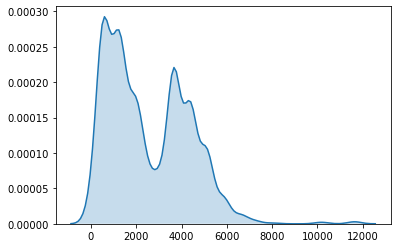

In [78]:
from sklearn.neighbors import KernelDensity
sns.kdeplot(data=y, shade=True)

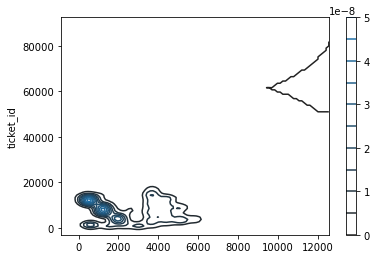

In [79]:
sns.kdeplot(y,new_df['ticket_id'], cbar=True)

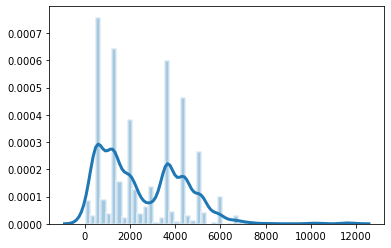

In [80]:
ax = sns.distplot(y, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

Text(0.5, 0, 'height')

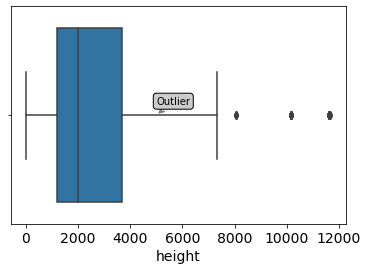

In [81]:
ax = sns.boxplot(y)

ax.annotate('Outlier', xy=(5000,0), xytext=(5000,-0.05), fontsize=10,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)

# check xgboost version
plt.xlabel('height', fontsize=14)

In [84]:
import xgboost as xbg
model_xgb = xbg.XGBRegressor(objective ='reg:linear',n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [85]:
model_xgb.fit(X_tr, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
model_xgb.predict(X_te)

array([3017.1755, 3031.901 , 3052.2954, ..., 3054.2556, 3187.1262,
       3053.2214], dtype=float32)

In [87]:
model_xgb.score(X_tr,y_train)

0.9999981318350294